<a href="https://colab.research.google.com/github/ItzNotCheetah/Predicting-Brushed-DC-Motor-Output-Torque-Using-SVR/blob/main/Predicting_Brushed_DC_Motor_Output_Torque_Using_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Brushed DC Motor Output Torque Using SVR

# Importing the libraries

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [66]:
dataset = pd.read_csv('robot_motor_torque.csv')
X = dataset['motor_current_A'].values
y = dataset['torque_Nm'].values

In [67]:
print(X)

[0.79520466 6.28336658 3.61959201 5.84302839 7.82831819 4.40026779
 4.10873962 0.76199884 2.29382404 4.09908351 5.49799397 6.46916448
 3.17134084 0.71430351 2.44753567 7.29482952 1.86440576 3.7265669
 7.46340695 0.39421397 4.88428156 7.6110101  1.99636246 4.47822137
 7.29120132 1.23872168 4.28261813 6.0531969  5.41830328 3.84847231
 1.7978229  4.02797393 3.10460058 3.92372901 3.05394501 6.73576036
 6.19545055 2.64915848 4.66647759 2.35318258 3.73217487 2.95323125
 5.32771581 3.08873845 3.78092523 5.81072816 3.42133627 7.2701015
 1.60752263 5.98072721 3.49451754 3.52633787 5.14816298 4.27866837
 3.43611063 0.21112967 0.9196463  5.73327627 4.28989565 5.63005162
 7.65265292 5.52672806 0.61440379 2.60905094 4.82223856 2.03393918
 7.7267738  7.57137615 6.81752687 3.88412717 6.76351838 1.22266301
 2.60812253 3.81137187 5.98640817 3.98943678 1.26763373 2.87958493
 2.73052412 2.54326745 1.49091092 3.43623383 3.69534113 6.24422293
 6.41184747 4.274643   3.79291631 6.27006609 7.12085382 5.464366

In [68]:
print(y)

[7.33856864e-02 4.65431615e-01 3.10852677e-01 3.47029018e-01
 4.52398811e-01 3.74655969e-01 2.75083246e-01 2.26557942e-02
 1.06409105e-01 2.55696246e-01 4.45257313e-01 3.08043703e-01
 1.29354646e-01 9.82131943e-03 1.75344549e-01 6.14568108e-01
 7.32754307e-02 2.24645354e-01 3.66151367e-01 6.28022256e-02
 3.53396600e-01 4.00453096e-01 1.60905209e-01 2.59737560e-01
 5.16450595e-01 8.91732750e-02 2.28193715e-01 4.51429633e-01
 2.94945958e-01 2.56439160e-01 1.25584903e-01 3.00527681e-01
 2.68625823e-01 2.63979836e-01 2.13737473e-01 4.87075473e-01
 3.93958653e-01 1.34615442e-01 3.16620083e-01 6.81167866e-02
 1.62682137e-01 2.33660807e-01 3.25183703e-01 1.62237821e-01
 2.27038450e-01 3.44191537e-01 2.19388557e-01 6.64540872e-01
 1.67415484e-01 4.69928266e-01 2.60856933e-01 2.13213902e-01
 3.61250041e-01 2.91913785e-01 2.16738343e-01 2.52866251e-02
 6.73059256e-02 3.27302141e-01 2.88258888e-01 3.86314435e-01
 4.79457923e-01 2.69406000e-01 5.61022088e-02 1.39597619e-01
 3.24940314e-01 1.711787

In [69]:
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)

In [70]:
print(X)

[[0.79520466]
 [6.28336658]
 [3.61959201]
 [5.84302839]
 [7.82831819]
 [4.40026779]
 [4.10873962]
 [0.76199884]
 [2.29382404]
 [4.09908351]
 [5.49799397]
 [6.46916448]
 [3.17134084]
 [0.71430351]
 [2.44753567]
 [7.29482952]
 [1.86440576]
 [3.7265669 ]
 [7.46340695]
 [0.39421397]
 [4.88428156]
 [7.6110101 ]
 [1.99636246]
 [4.47822137]
 [7.29120132]
 [1.23872168]
 [4.28261813]
 [6.0531969 ]
 [5.41830328]
 [3.84847231]
 [1.7978229 ]
 [4.02797393]
 [3.10460058]
 [3.92372901]
 [3.05394501]
 [6.73576036]
 [6.19545055]
 [2.64915848]
 [4.66647759]
 [2.35318258]
 [3.73217487]
 [2.95323125]
 [5.32771581]
 [3.08873845]
 [3.78092523]
 [5.81072816]
 [3.42133627]
 [7.2701015 ]
 [1.60752263]
 [5.98072721]
 [3.49451754]
 [3.52633787]
 [5.14816298]
 [4.27866837]
 [3.43611063]
 [0.21112967]
 [0.9196463 ]
 [5.73327627]
 [4.28989565]
 [5.63005162]
 [7.65265292]
 [5.52672806]
 [0.61440379]
 [2.60905094]
 [4.82223856]
 [2.03393918]
 [7.7267738 ]
 [7.57137615]
 [6.81752687]
 [3.88412717]
 [6.76351838]
 [1.22

In [71]:
print(y)

[[7.33856864e-02]
 [4.65431615e-01]
 [3.10852677e-01]
 [3.47029018e-01]
 [4.52398811e-01]
 [3.74655969e-01]
 [2.75083246e-01]
 [2.26557942e-02]
 [1.06409105e-01]
 [2.55696246e-01]
 [4.45257313e-01]
 [3.08043703e-01]
 [1.29354646e-01]
 [9.82131943e-03]
 [1.75344549e-01]
 [6.14568108e-01]
 [7.32754307e-02]
 [2.24645354e-01]
 [3.66151367e-01]
 [6.28022256e-02]
 [3.53396600e-01]
 [4.00453096e-01]
 [1.60905209e-01]
 [2.59737560e-01]
 [5.16450595e-01]
 [8.91732750e-02]
 [2.28193715e-01]
 [4.51429633e-01]
 [2.94945958e-01]
 [2.56439160e-01]
 [1.25584903e-01]
 [3.00527681e-01]
 [2.68625823e-01]
 [2.63979836e-01]
 [2.13737473e-01]
 [4.87075473e-01]
 [3.93958653e-01]
 [1.34615442e-01]
 [3.16620083e-01]
 [6.81167866e-02]
 [1.62682137e-01]
 [2.33660807e-01]
 [3.25183703e-01]
 [1.62237821e-01]
 [2.27038450e-01]
 [3.44191537e-01]
 [2.19388557e-01]
 [6.64540872e-01]
 [1.67415484e-01]
 [4.69928266e-01]
 [2.60856933e-01]
 [2.13213902e-01]
 [3.61250041e-01]
 [2.91913785e-01]
 [2.16738343e-01]
 [2.528662

# Training the SVR model on the whole dataset

In [75]:
from sklearn.svm import SVR
regressor = SVR(kernel= 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Visualising the SVR results

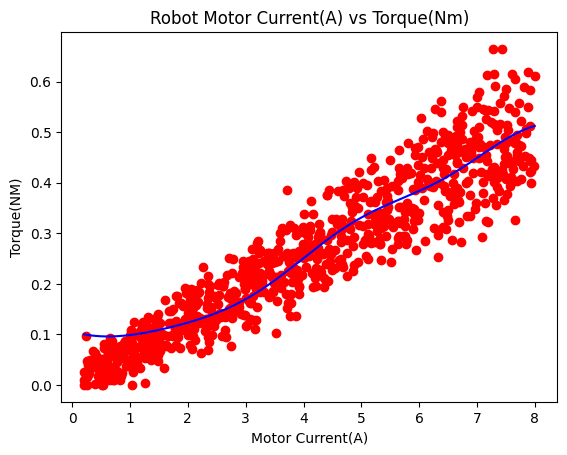

In [78]:
X_grid = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
plt.scatter(X, y, color= 'red')
plt.plot(X_grid, regressor.predict(X_grid).reshape(-1, 1), color= 'blue')
plt.title('Robot Motor Current(A) vs Torque(Nm)')
plt.xlabel('Motor Current(A)')
plt.ylabel('Torque(NM)')
plt.show()